<a href="https://colab.research.google.com/github/shrutin567/ai-lab-2023/blob/main/ai_lab_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programs: <br>
1. Write a program to implement Depth First Search.

2. Write a program to implement Breadth First Search.

3. Write a program to implement the Tower of Hanoi problem.

4. Write a program to use reinforcement learning through an agent and obtain the results for the grid world example.

5. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination Algorithm to output a description of the set of all hypotheses consistent with the training examples.

6. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

7. Write a program to implement the Linear Regression model for a sample training data set stored as a .CSV file.

8. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

9. Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

10. Write a python program to use the concepts of Computer Vision to read an image and obtain the gray shading filters modify it and use filters to obtain the edge detection using canny method and face detection.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


1. DFS


In [ ]:
from collections import defaultdict

class Graph:

	def __init__(self):

		self.graph = defaultdict(list)

	def addEdge(self,u,v):
		self.graph[u].append(v)

	def DFSUtil(self, v, visited):

		visited[v]= True
		print(v)

		for i in self.graph[v]:
			if visited[i] == False:
				self.DFSUtil(i, visited)

	def DFS(self):
		V = len(self.graph)

		visited =[False]*(V)

		for i in range(V):
			if visited[i] == False:
				self.DFSUtil(i, visited)

g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

print ("Following is Depth First Traversal")
g.DFS()

Following is Depth First Traversal
0
1
2
3


2. BFS

In [ ]:
from collections import defaultdict

class Graph:

	def __init__(self):
		self.graph = defaultdict(list)

	def addEdge(self,u,v):
		self.graph[u].append(v)

	def BFS(self, s):
		visited = [False] * (len(self.graph))
		queue = []

		queue.append(s)
		visited[s] = True

		while queue:

			s = queue.pop(0)
			print (s, end = " ")

			for i in self.graph[s]:
				if visited[i] == False:
					queue.append(i)
					visited[i] = True

g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

print ("Following is Breadth First Traversal")
g.BFS(2)

Following is Breadth First Traversal
2 0 3 1 

3. TOH

In [ ]:
def TowerOfHanoi(n , source, destination, auxiliary):
	if n==1:
		print ("Move disk 1 from source",source,"to destination",destination)
		return
	TowerOfHanoi(n-1, source, auxiliary, destination)
	print ("Move disk",n,"from source",source,"to destination",destination)
	TowerOfHanoi(n-1, auxiliary, destination, source)

n = int(input("Enter number of towers: "))
TowerOfHanoi(n,'A','B','C')

Enter number of towers: 2
Move disk 1 from source A to destination C
Move disk 2 from source A to destination B
Move disk 1 from source C to destination B


4. Reinforcement Learning

In [ ]:
import numpy as np

# global variables
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = True

In [ ]:
class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):

        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')

class Agent:

    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.lr = 0.2
        self.exp_rate = 0.3

        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                # explicitly assign end state to reward values
                self.state_values[self.State.state] = reward  # this is optional
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr * (reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")

    def showValues(self):
      self.State.showBoard()
      for i in range(0, BOARD_ROWS):
        print('----------------------------------')
        out = '| '
        for j in range(0, BOARD_COLS):
          out += str(self.state_values[(i, j)]).ljust(6) + ' | '
        print(out)
      print('----------------------------------')


In [ ]:
if __name__ == "__main__":
    ag = Agent()
    ag.play(50)
    print(ag.showValues())

Streaming output truncated to the last 5000 lines.
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action down
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action up
nxt state (0, 0)
---------------------
current position (0, 0) action down
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
curren

In [ ]:

import numpy as np
import random

gamma = 1
gridSize = 4
rewardValue = -1
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

def actionValue(initialPosition, action):
    if initialPosition in terminationStates:
        finalPosition = initialPosition
        reward = 0
    else:
        finalPosition = np.array(initialPosition) + np.array(action)
        reward = rewardValue
        if -1 in finalPosition or gridSize in finalPosition:
            finalPosition = initialPosition
            reward = rewardValue
    return finalPosition, reward

valueMap = np.zeros((gridSize, gridSize))
valueMap1 = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

def policy_evaluation(numIterations, gamma, theta, valueMap):
    for i in range(numIterations):
        delta = 0
        for state in states:
            weightedRewards = 0
            for action in actions:
                finalPosition, reward = actionValue(state, action)
                weightedRewards += 1/4 * (reward + gamma * valueMap[finalPosition[0], finalPosition[1]])
            valueMap1[state[0], state[1]] = weightedRewards
            delta = max(delta, abs(weightedRewards - valueMap[state[0], state[1]]))
        valueMap = np.copy(valueMap1)
        if delta < theta:
            print(valueMap)
            break

valueMap = np.zeros((gridSize, gridSize))
valueMap1 = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
policy_evaluation(1000, 1, 0.001, valueMap)

[[  0.         -13.98945772 -19.98437823 -21.98251832]
 [-13.98945772 -17.98623815 -19.98448273 -19.98437823]
 [-19.98437823 -19.98448273 -17.98623815 -13.98945772]
 [-21.98251832 -19.98437823 -13.98945772   0.        ]]


5. Candidate Elimination Algorithm

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/DATASETS/ENJOYSPORT.csv')
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Instances are:
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]

Target Values are:  [1 1 0 1]

Initialization of specific_h and genearal_h

Specific Boundary:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Specific Bundary after  1 Instance is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is  ['Sunny' 'Warm' 'High'

In [ ]:

import csv

a = []

print("\nThe Given Training Data Set")

with open('/content/drive/MyDrive/DATASETS/ENJOYSPORT.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        a.append(row)
        print(row)

num_attributes = len(a[0]) - 1

print("\nThe initial value of hypothesis: ")
S = ['0'] * num_attributes
G = ['?'] * num_attributes

print("\nThe most specific hypothesis S0: [0,0,0,0,0,0]")
print("\nThe most general hypothesis G0: [?,?,?,?,?,?]")

for j in range(0, num_attributes):
    S[j] = a[0][j]

print("\nCandidate Elimination algorithm Hypotheses Version Space Computation\n")
temp = []

for i in range(0, len(a)):
    if a[i][num_attributes] == 'Yes':
        for j in range(0, num_attributes):
            if a[i][j] != S[j]:
                S[j] = '?'

        for j in range(0, num_attributes):
            for k in range(1, len(temp)):
                if temp[k][j] != '?' and temp[k][j] != S[j]:
                    del temp[k]

        print("---------------------------------------------------------")
        print("For Training Example No: {0}, the hypothesis is S{0}".format(i+1), S)

        if len(temp) == 0:
            print("For Training Example No: {0}, the hypothesis is G{0}".format(i+1), G)
        else:
            print("For Positive Training Example No: {0}, the hypothesis is G{0}".format(i+1), temp)

    if a[i][num_attributes] == 'No':
        for j in range(0, num_attributes):
            if S[j] != a[i][j] and S[j] != '?':
                G[j] = S[j]
                temp.append(G)
                G = ['?'] * num_attributes

        print(" ")
        print("For Training Example No: {0}, the hypothesis is S{0}".format(i+1), S)
        print("For Training Example No: {0}, the hypothesis is G{0}".format(i+1), temp)


The Given Training Data Set
['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'EnjoySport']
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', '1']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', '1']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', '0']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', '1']

The initial value of hypothesis: 

The most specific hypothesis S0: [0,0,0,0,0,0]

The most general hypothesis G0: [?,?,?,?,?,?]

Candidate Elimination algorithm Hypotheses Version Space Computation



6. Naive Bayesian Classifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB
Number of records in each label are


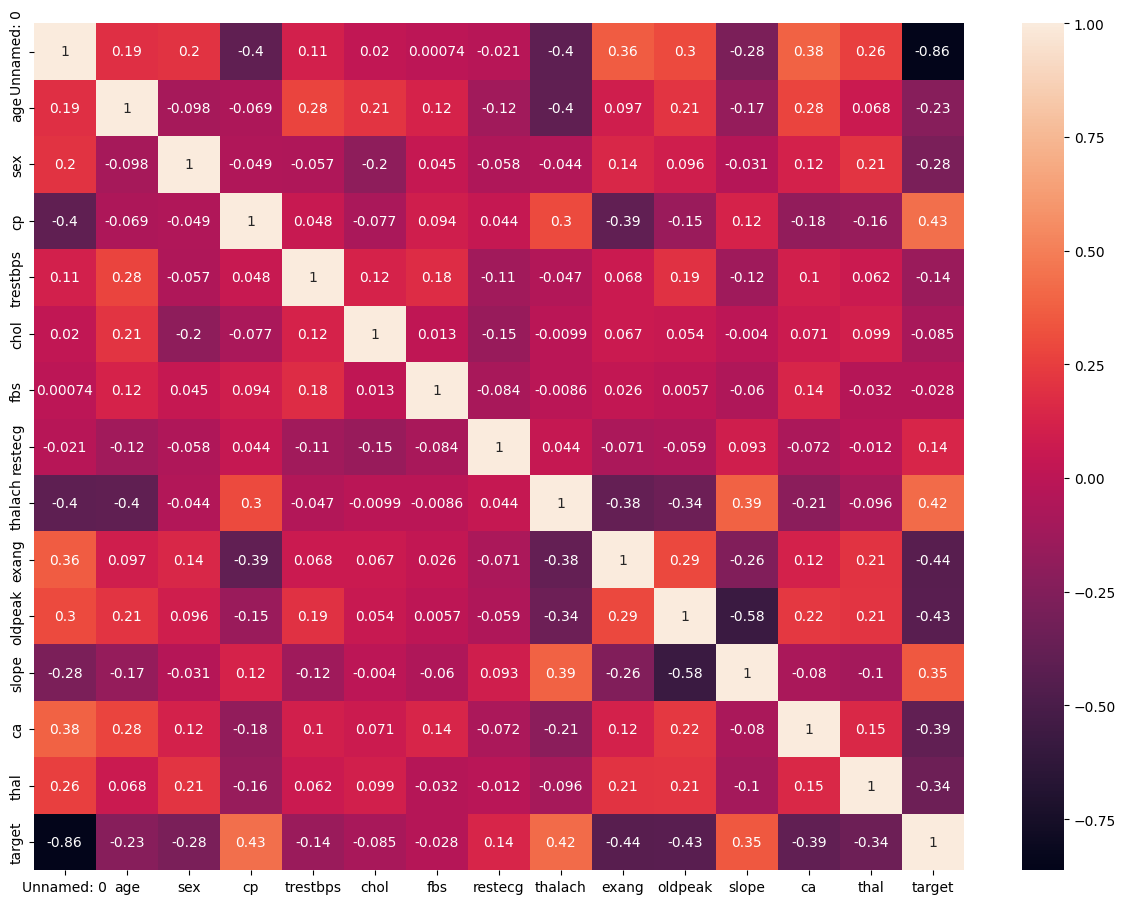

(303, 14) (303,)
(212, 14) (91, 14) (212,) (91,)
Accuracy on the training set: 0.96
Accuracy on the test set: 0.96
[[40  1]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.98      0.94      0.96        50

    accuracy                           0.96        91
   macro avg       0.95      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



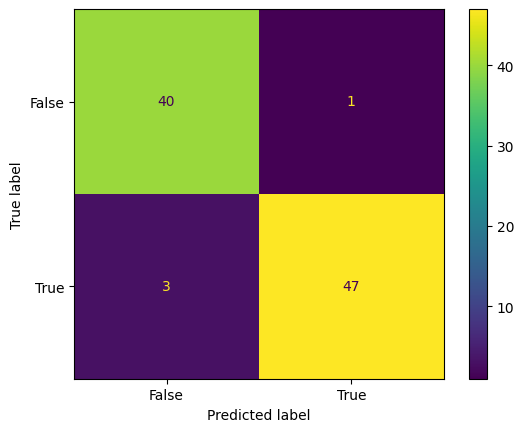

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('/content/drive/MyDrive/DATASETS/Heart.csv')
df.head()
df.info()
print("Number of records in each label are")
df['target'].value_counts()
df_corr = df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(df_corr, annot = True)
plt.show()
X = df.drop('target',axis=1)
y=df['target']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_test_predict_nb))
print(classification_report(y_test, y_test_predict_nb))
confusion_matrix = confusion_matrix(y_test, y_test_predict_nb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

7. Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/DATASETS/tvmarketing.csv')
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(200, 2)

In [ ]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


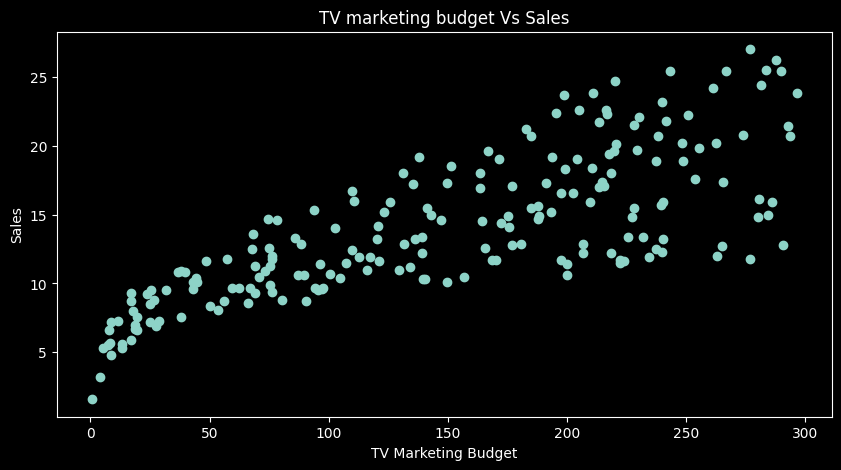

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df['TV'], df['Sales'])
plt.title("TV marketing budget Vs Sales")
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.show()

In [ ]:
X=df['TV']
y=df['Sales']
print(X.shape, y.shape)

(200,) (200,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(140,) (60,) (140,) (60,)


In [ ]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(140, 1) (60, 1) (140, 1) (60, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

[7.23945983]
[[0.0464078]]


In [ ]:
slope = lr.coef_[0]
intercept = lr.intercept_[0]

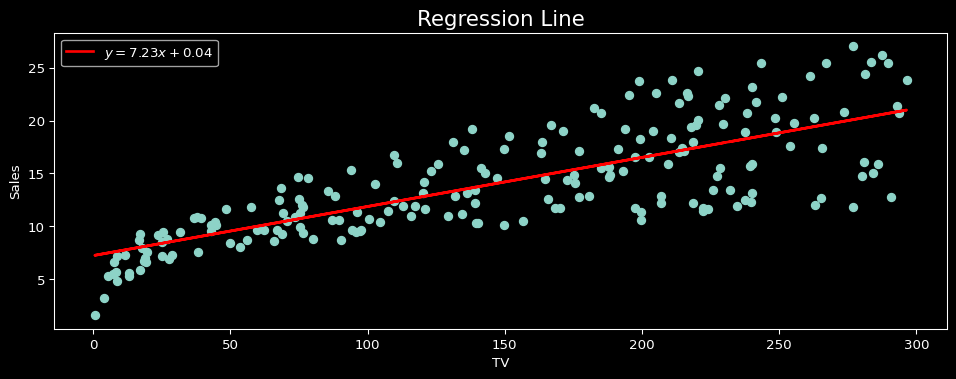

In [ ]:
# Plot the regression line in the scatter plot between TV and Sales values.
plt.style.use('dark_background')
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Regression Line", fontsize = 16)
plt.scatter(df['TV'], df['Sales'])
plt.plot(df['TV'], slope * df['TV'] + intercept, color = 'r', linewidth = 2, label = '$y = 7.23x + 0.04$')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

y_pred[:5]

array([[14.81785392],
       [16.30754437],
       [20.83230507],
       [ 7.78243112],
       [17.46309864]])

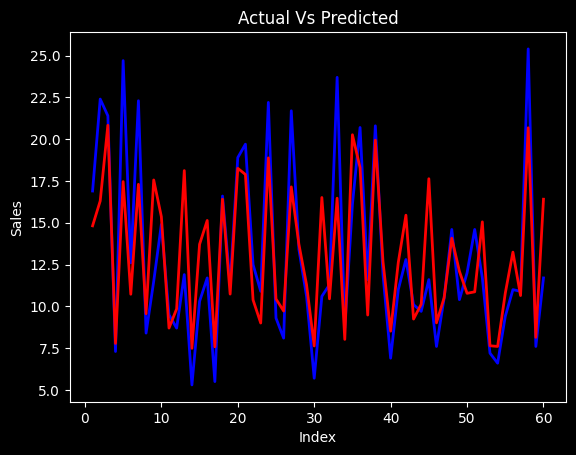

In [ ]:
x_axis = [i for i in range(1,61)]
plt.plot(x_axis,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(x_axis,y_pred, color="red",  linewidth=2, linestyle="-")
plt.title('Actual Vs Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8.970991242413614
r_square_value : 0.6714477229302764


In [ ]:
pred = lr.predict([[1000]])
pred

array([[53.64726196]])

8. Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/Covid.csv')
df.head()

,ID,Fever,Cough,Breathing issues,Infected
0,1,NO,NO,NO,NO
1,2,YES,YES,YES,YES
2,3,YES,YES,NO,NO
3,4,YES,NO,YES,YES
4,5,YES,YES,YES,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                14 non-null     int64 
 1   Fever             14 non-null     object
 2   Cough             14 non-null     object
 3   Breathing issues  14 non-null     object
 4   Infected          14 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [ ]:
df.columns

Index(['ID', 'Fever', 'Cough', 'Breathing issues', 'Infected'], dtype='object')

In [ ]:
df=df.drop('ID',axis =1)

In [ ]:
dic = {'YES':1, 'NO':0}
for col in df.columns:

    df[col] = df[col].map(dic)

df.head()

,Fever,Cough,Breathing issues,Infected
0,0,0,0,0
1,1,1,1,1
2,1,1,0,0
3,1,0,1,1
4,1,1,1,1


In [ ]:
X = df.iloc[:,:3]
X.head()

,Fever,Cough,Breathing issues
0,0,0,0
1,1,1,1
2,1,1,0
3,1,0,1
4,1,1,1


In [ ]:
y = df['Infected']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Infected, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42, stratify = y)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


Training split input-  (11, 3)
Testing split input-  (3, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier                      #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix  #for visualizing tree
from sklearn.tree import plot_tree

In [ ]:
dtree=DecisionTreeClassifier(criterion = "entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[1 0]
 [1 1]]


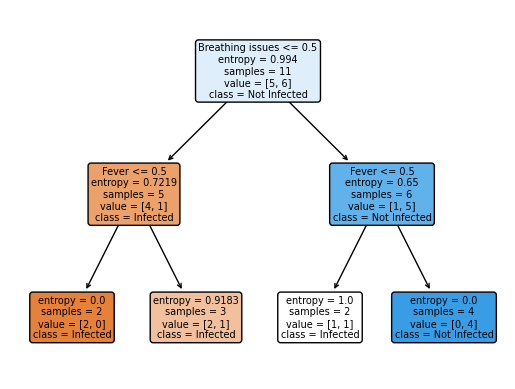

In [ ]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns,
                     class_names =["Infected", "Not Infected"] , filled = True , precision = 4, rounded = True)

9. Backpropagation

In [ ]:
import random
from math import exp
from random import seed

In [ ]:
# Initialize a network

def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random.uniform(-0.5,0.5) for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    i= 1
    print("\n The initialised Neural Network:\n")
    for layer in network:
        j=1
        for sub in layer:
            print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
            j=j+1
        i=i+1
    return network

In [ ]:
# Calculate neuron activation (net) for an input

def calc_net_input(weights, inputs):
    bias = weights[-1]
    for i in range(len(weights)-1):
        net_input = weights[i] * inputs[i] + bias
    return net_input

In [ ]:
# Transfer neuron activation to sigmoid function
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = calc_net_input(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()

        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])

        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):

    print("\n Network Training Begins:\n")

    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

    print("\n Network Training Ends:\n")

In [ ]:
#Test training backprop algorithm
seed(2)
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

print("\n The input Data Set :\n",dataset)
n_inputs = len(dataset[0]) - 1
print("\n Number of Inputs :\n",n_inputs)
n_outputs = len(set([row[-1] for row in dataset]))
print("\n Number of Outputs :\n",n_outputs)


 The input Data Set :
 [[2.7810836, 2.550537003, 0], [1.465489372, 2.362125076, 0], [3.396561688, 4.400293529, 0], [1.38807019, 1.850220317, 0], [3.06407232, 3.005305973, 0], [7.627531214, 2.759262235, 1], [5.332441248, 2.088626775, 1], [6.922596716, 1.77106367, 1], [8.675418651, -0.242068655, 1], [7.673756466, 3.508563011, 1]]

 Number of Inputs :
 2

 Number of Outputs :
 2


In [ ]:
#Network Initialization
network = initialize_network(n_inputs, 2, n_outputs)


 The initialised Neural Network:


 Layer[1] Node[1]:
 {'weights': [0.4560342718892494, 0.4478274870593494, -0.4434486322731913]}

 Layer[1] Node[2]:
 {'weights': [-0.41512800484107837, 0.33549887812944956, 0.2359699890685233]}

 Layer[2] Node[1]:
 {'weights': [0.1697304014402209, -0.1918635424108558, 0.10594416567846243]}

 Layer[2] Node[2]:
 {'weights': [0.10680173364083789, 0.08120401711200309, -0.3416171297451944]}


In [ ]:
# Training the Network
train_network(network, dataset, 0.5, 20, n_outputs)


 Network Training Begins:

>epoch=0, lrate=0.500, error=5.201
>epoch=1, lrate=0.500, error=5.190
>epoch=2, lrate=0.500, error=5.197
>epoch=3, lrate=0.500, error=5.206
>epoch=4, lrate=0.500, error=5.211
>epoch=5, lrate=0.500, error=5.214
>epoch=6, lrate=0.500, error=5.214
>epoch=7, lrate=0.500, error=5.212
>epoch=8, lrate=0.500, error=5.210
>epoch=9, lrate=0.500, error=5.207
>epoch=10, lrate=0.500, error=5.203
>epoch=11, lrate=0.500, error=5.200
>epoch=12, lrate=0.500, error=5.196
>epoch=13, lrate=0.500, error=5.193
>epoch=14, lrate=0.500, error=5.189
>epoch=15, lrate=0.500, error=5.186
>epoch=16, lrate=0.500, error=5.183
>epoch=17, lrate=0.500, error=5.179
>epoch=18, lrate=0.500, error=5.176
>epoch=19, lrate=0.500, error=5.173

 Network Training Ends:



In [ ]:
print("\n Final Neural Network :")

i= 1
for layer in network:
    j=1
    for sub in layer:
        print("\n Layer[%d] Node[%d]:\n" %(i,j),sub)
        j=j+1
    i=i+1


 Final Neural Network :

 Layer[1] Node[1]:
 {'weights': [-2.9301707665301535, 0.46577580156590975, -0.602187932940896], 'output': 0.7557888109113101, 'delta': -0.014682597285327538}

 Layer[1] Node[2]:
 {'weights': [0.5671119134318647, -0.12012371965812904, 0.15383728663060697], 'output': 0.4191294134823578, 'delta': 0.008824017727735665}

 Layer[2] Node[1]:
 {'weights': [0.5033039879898693, -0.15792851989461984, -0.12058709359314002], 'output': 0.47056776979076936, 'delta': -0.11723431021131317}

 Layer[2] Node[2]:
 {'weights': [-0.0863014632451988, 0.20007470879335046, 0.09974416549559104], 'output': 0.5286069302373225, 'delta': 0.11746249987795977}


In [ ]:
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [ ]:
for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=0, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


10. Canny Edge Detection

In [ ]:
import cv2

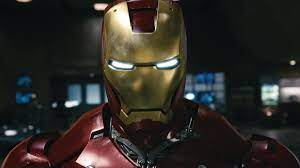

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/DATASETS/im1.jfif', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection


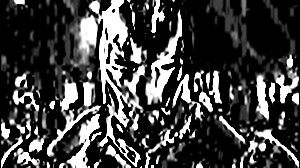

In [ ]:
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)

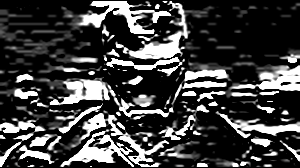

In [ ]:
cv2_imshow(sobely)

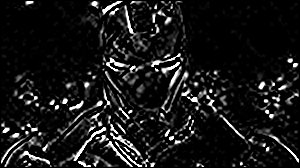

In [ ]:
cv2_imshow(sobelxy)

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

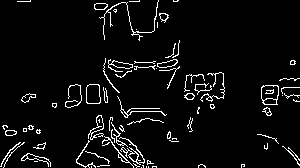

In [ ]:
cv2_imshow(edges)

In [ ]:
from PIL import Image as im
edge_img = im.fromarray(edges)
edge_img.save('/content/drive/MyDrive/DATASETS/im2.jfif')

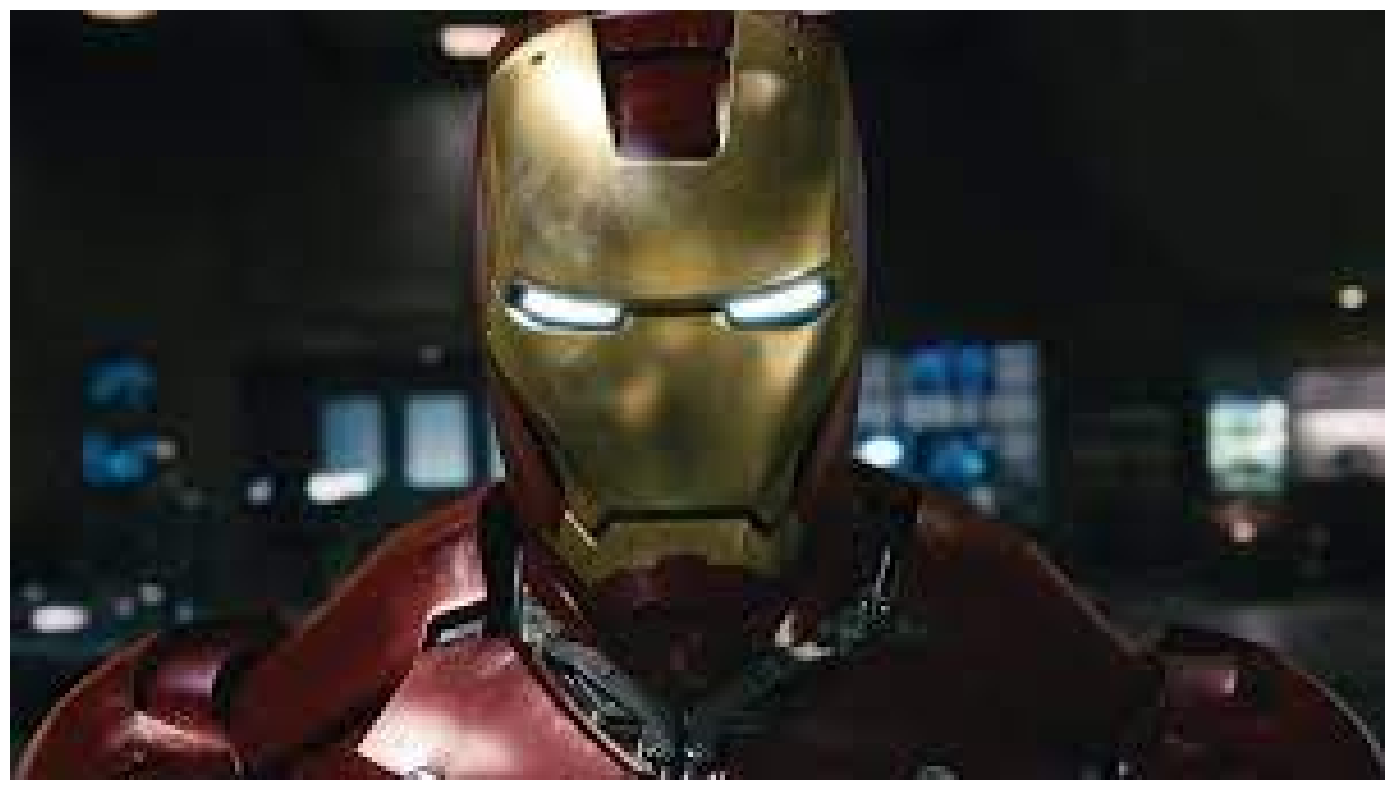

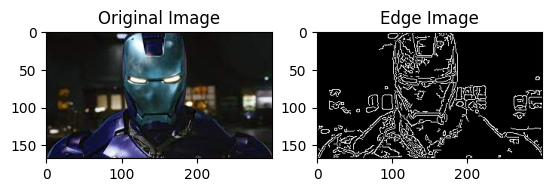

In [ ]:
#Face Detection

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/drive/MyDrive/DATASETS/im1.jfif')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Face detection
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

# Draw bounding boxes around the detected faces
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)

# Display the image with bounding boxes
plt.figure(figsize=(20, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Applying Canny edge detection
edges = cv2.Canny(image, 50, 150)

# Display original image and edge image side by side
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("Edge Image")
plt.imshow(edges, cmap='gray')
plt.show()
